# 1. Dane

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

column_names = [
    'white-king-file', 'white-king-rank',
    'white-rook-file', 'white-rook-rank',
    'black-king-file', 'black-king-rank',
    'white-depth-of-win']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data', names=column_names)

result_map = {
    'draw': -1, 'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 
    'ten': 10, 'eleven': 11, 'twelve': 12, 'thirteen': 13, 
    'fourteen': 14, 'fifteen': 15, 'sixteen': 16}

pos_map = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}

df['white-depth-of-win'] = df['white-depth-of-win'].map(result_map)

df['white-king-file']=df['white-king-file'].map(pos_map).astype(int)
df['white-rook-file']=df['white-rook-file'].map(pos_map).astype(int)
df['black-king-file']=df['black-king-file'].map(pos_map).astype(int)

In [109]:
df

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win
0,1,1,2,3,3,2,-1
1,1,1,3,1,3,2,-1
2,1,1,3,1,4,1,-1
3,1,1,3,1,4,2,-1
4,1,1,3,2,3,1,-1
...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,16
28052,2,1,7,7,5,6,16
28053,2,1,7,7,5,7,16
28054,2,1,7,7,6,5,16


In [110]:
df['euklid'] = np.sqrt( np.square(df["white-king-rank"] - df["black-king-rank"]) + np.square(df["white-king-file"] - df["black-king-file"]) )

df['czebysz'] = np.maximum( np.abs(df["black-king-file"] - df["white-king-file"]), np.abs(df["black-king-rank"] - df["white-king-rank"]) )

df['manhat'] = np.abs(df["black-king-rank"] - df["white-king-rank"]) + np.abs(df["black-king-file"] - df["white-king-file"])

distfile = np.minimum(df['black-king-file'] - 1, 8 - df['black-king-file'])
distrank = np.minimum(df['black-king-rank'] - 1, 8 - df['black-king-rank'])
df['black_king_edge_dist'] = np.minimum(distfile,distrank)

df_wins = df[df['white-depth-of-win'] != -1].copy()

In [111]:
df

,white-king-file,white-king-rank,white-rook-file,white-rook-rank,black-king-file,black-king-rank,white-depth-of-win,euklid,czebysz,manhat,black_king_edge_dist
0,1,1,2,3,3,2,-1,2.236068,2,3,1
1,1,1,3,1,3,2,-1,2.236068,2,3,1
2,1,1,3,1,4,1,-1,3.000000,3,3,0
3,1,1,3,1,4,2,-1,3.162278,3,4,1
4,1,1,3,2,3,1,-1,2.000000,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...
28051,2,1,7,7,5,5,16,5.000000,4,7,3
28052,2,1,7,7,5,6,16,5.830952,5,8,2
28053,2,1,7,7,5,7,16,6.708204,6,9,1
28054,2,1,7,7,6,5,16,5.656854,4,8,2


## Pytanie 1 [2pkt.]
### Gdzie zwykle znajduje się na planszy czarny król, kiedy jest matowany (white-depth-of-win=0)? Gdzie znajduje się, kiedy gra kończy się remisem (white-depth-of-win=-1)?

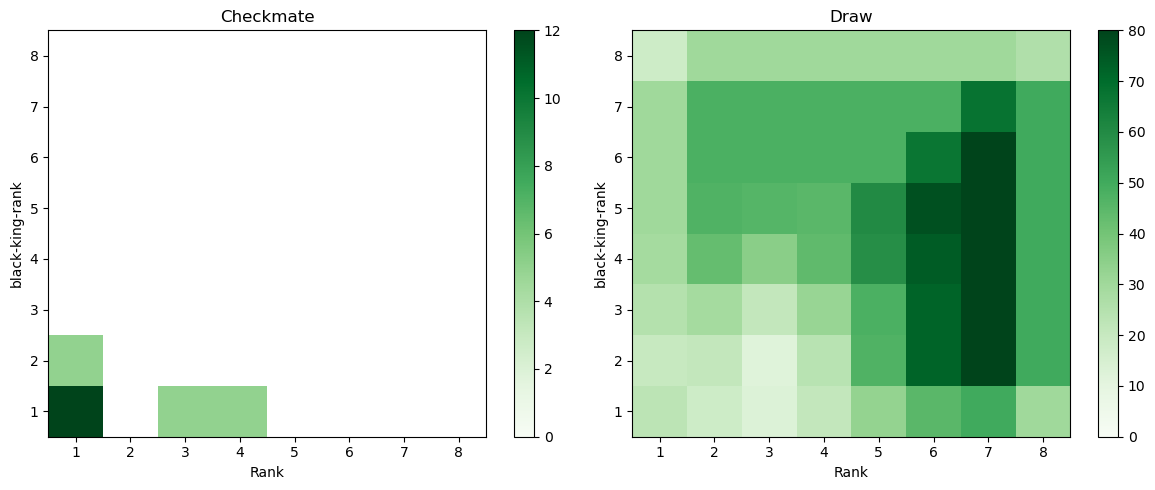

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

checkmate_df = df[df['white-depth-of-win'] == 0]
draw_df = df[df['white-depth-of-win'] == -1]

sns.histplot(
    data=checkmate_df, x='black-king-file', y='black-king-rank',
    binwidth=1, discrete=True, cbar=True, cmap='Greens',
    ax=axes[0])

sns.histplot(
    data=draw_df, x='black-king-file', y='black-king-rank',
    binwidth=1, discrete=True, cbar=True, cmap='Greens',
    ax=axes[1])

axes[0].set_title('Checkmate')
axes[0].set_xlabel('File')
axes[0].set_xlabel('Rank')
axes[0].set_xlim(0.5, 8.5)
axes[0].set_ylim(0.5, 8.5)

axes[1].set_title('Draw')
axes[1].set_xlabel('File')
axes[1].set_xlabel('Rank')
axes[1].set_xlim(0.5, 8.5)
axes[1].set_ylim(0.5, 8.5)

plt.tight_layout()
plt.show()

##### Gdy król jest matowany, znajduje się w rogu szachownicy, najczęściej na polu A1. Nieco rzadziej znajduje się na polach bardzo bliskich lub sąsiednich (A2, C1, D1)
##### Gdy nastepuje remis, król znajduje się na środku szachownicy, o wiele częściej po prawej stronie. Najczęściej gra kończy się, gdy król znajduje się na kolumnie G.

## Pytanie 2 [2pkt.]
### Jednym z istotnych czynników tego, w ilu ruchach gra się zakończy jest dystans pomiędzy białym królem a czarnym królem. Jaka metryka dystansu (Euklidesowa, Manhattan, lub Czebyszewa) pomiędzy nimi pozwoli najlepiej oszacować liczbę ruchów do zakończenia gry? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

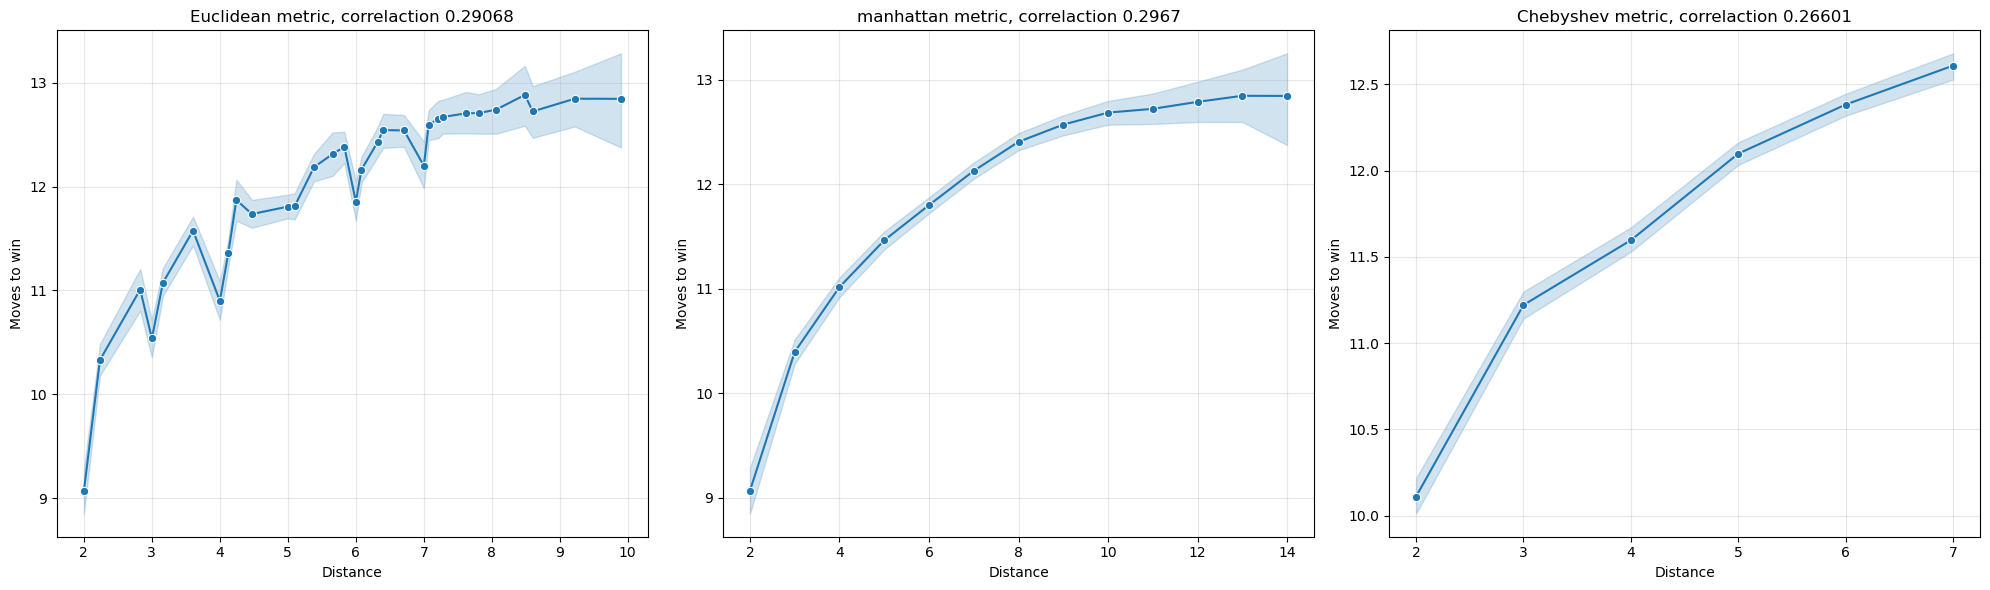

In [113]:
corr_dist = df_wins[['white-depth-of-win', 'euklid', 'manhat', 'czebysz']].corr()
fig, axs = plt.subplots(1, 3, figsize=(20, 6))

metric = [
    ('euklid', 'Euclidean metric'),
    ('manhat', 'manhattan metric'),
    ('czebysz', 'Chebyshev metric')]

for i, (col, name) in enumerate(metric):
    corr = np.round(corr_dist.loc['white-depth-of-win', col],5)
    sns.lineplot(
        data=df_wins, x=col, y='white-depth-of-win', 
        ax=axs[i], marker='o')
    axs[i].set_title(f"{name}, correlaction {corr}")
    axs[i].set_xlabel("Distance")
    axs[i].set_ylabel("Moves to win")
    axs[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Najlepszą metryką do oszacowania dystansu będzie metyka manhattan.
#### Wynika to z tego, że aby zamatować króla, to wieża musi odcinać mu drogę. Jak wiadomo, wieża porusza się tylko po pionie i poziomie, więc metryka manhattan oddaje to najlepiej, ponieważ chodzenie na skos w takiej końcówce nie jest coś, co chcemy osiągnąć.

## Pytanie 3 [2pkt.]
### Czy informacja o odległości czarnego króla od krawędzi planszy może być przydatna w określeniu w ilu ruchach zakończy się gra? Czy uzupełnienie tej informacji o odległość pomiędzy białym a czarnym królem z poprzedniego zadania może dodatkowo pomóc? Do tej analizy zignoruj sytuacje remisowe (white-depth-of-win = -1).

Text(0, 0.5, 'Moves to checkmate')

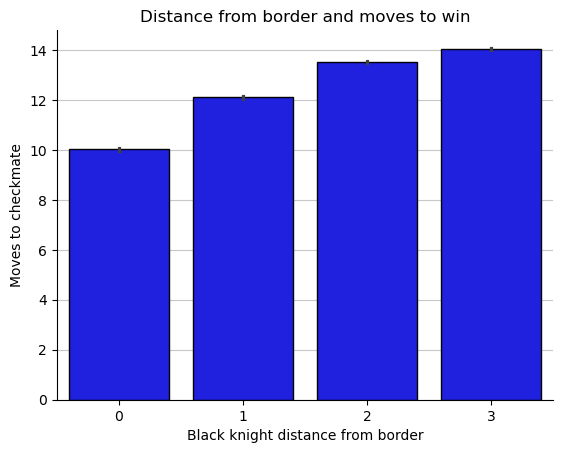

In [114]:
fig = sns.barplot(
    data=df_wins, 
    x='black_king_edge_dist', 
    y='white-depth-of-win',
    color='blue',
    edgecolor='black',
    linewidth=1)

fig.yaxis.grid(True, linestyle='-', alpha=0.7)
fig.set_axisbelow(True)
sns.despine()
plt.title('Distance from border and moves to win')
plt.xlabel("Black knight distance from border")
plt.ylabel('Moves to checkmate')


#### Nim dalej czarny król znajduje się od bandy szachownicy, tym więcej potrzeba ruchów by wygrać

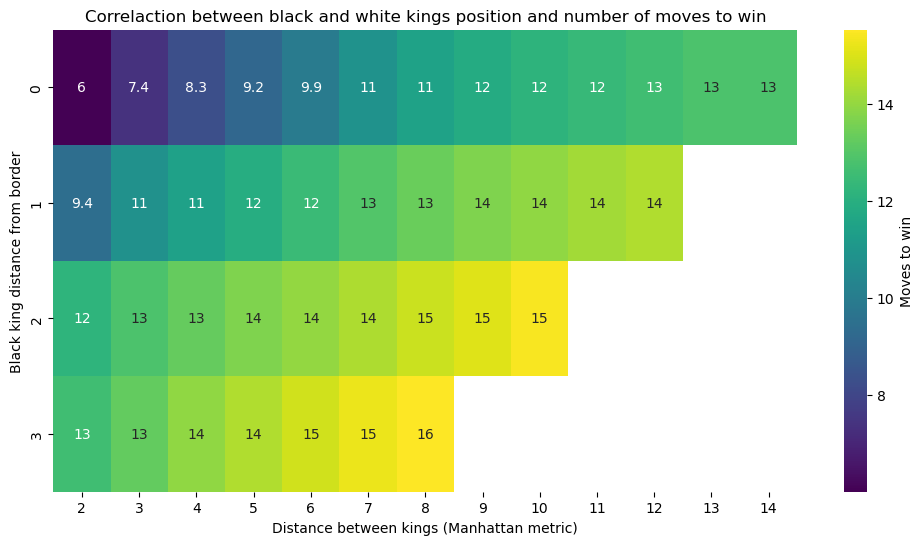

In [ ]:
heatmap_data = df_wins.pivot_table(
    index='black_king_edge_dist', columns='manhat', 
    values='white-depth-of-win', aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data, annot=True,
    cmap="viridis", cbar_kws={'label': 'Moves to win'})
plt.title('Correlaction between black and white kings position and number of moves to win')
plt.ylabel('Black king distance from border')
plt.xlabel("Distance between kings (Manhattan metric)")
plt.show()

#### Dodanie informacji o położeniu drugiego króla jak najbardziej pomaga. Widać, że niezależnie od położenia czarnego króla, nim dalej są królowie, tym dłużej zajmuje matowanie.
#### Oczywiście dalej zachowana jest proporcja, że przy tej samej odległości królów od siebie, to położenie czarnego króla od bandy ma znaczenie
